In [202]:
import cv2
from glob import glob
import numpy as np
from PIL import ImageStat
import shutil
import os
#for img in glob(f'{path}/*'
brns, contrast, intencity, intencity_bg = [], [], [], []
for m in glob('test100fnl/test100/*_mask.png'):
    #print(f)
    imfile = m.replace('_mask.png', '.png')
    #print(mask)
    img = cv2.imread(imfile)
    mask = cv2.imread(m, 0)
    

    # roadmark and background pixels
    rm_area = np.where(mask==255)
    rm_bg = np.where(mask!=255)

    # average intensity values for roadmark and background
    rm, bg = np.mean(img[rm_area]), np.mean(img[rm_bg])
    intencity.append(rm)
    intencity_bg.append(bg)
    #print(f, rm,bg)

    wcontrast = (rm-bg)/bg

    #brightness value
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    cv = cv2.mean(hsv[...,2], mask=mask)
    res = cv2.bitwise_and(hsv[...,2], hsv[...,2],mask = mask)
    #print(cv2.mean(res))
    #pil = brightness(res)
    #print('Brightness value cv: ',f, int(list(cv)[0]))
    brns_value= int(list(cv)[0])
    brns.append(brns_value)
    contrast.append(wcontrast)
    thresh1, thresh2 = 1, 1.9
    if wcontrast > thresh1 and wcontrast < thresh2:
        print(imfile, wcontrast, brns_value)
        os.makedirs(f'{thresh1}', exist_ok=True)
        savename = imfile.split('/')[-1]
        shutil.copy(imfile, f'{thresh1}/{wcontrast:.2f}_{savename}')
 
    #if wcontrast < 0.2:
    #    print(imfile, wcontrast, brns_value)
    #print(intensity_rm, intensity_bg)
    #print('Weber contrast:' , wcontrast)

test100fnl/test100/3201213_E_18_CCW_in_N_B_001_01642.png 1.4758920640545763 175
test100fnl/test100/4201213_E_18_CCW_in_N_B_001_01642.png 1.051671562889616 217
test100fnl/test100/3201229_E_18_CCW_in_D_S_002_00245.png 1.169608330658367 42
test100fnl/test100/2201213_E_18_CCW_in_N_B_005_00582.png 1.649220014270584 147
test100fnl/test100/2201213_E_18_CCW_in_N_B_001_01642.png 1.4731938291346973 251
test100fnl/test100/3201215_E_14_CW_in_N_B_002_00377.png 1.421820063039031 213
test100fnl/test100/5201215_E_14_CW_in_N_B_005_00227.png 1.0021463661655559 101
test100fnl/test100/0201213_E_18_CCW_in_N_B_005_00582.png 1.2995449334525049 214


In [26]:
len(brns)

443

In [33]:
wcontrast

0.43183211920139825

(array([ 26.,  85., 116., 112.,  69.,  22.,   7.,   2.,   2.,   2.]),
 array([-0.09051736,  0.08345638,  0.25743012,  0.43140385,  0.60537759,
         0.77935133,  0.95332507,  1.1272988 ,  1.30127254,  1.47524628,
         1.64922001]),
 <BarContainer object of 10 artists>)

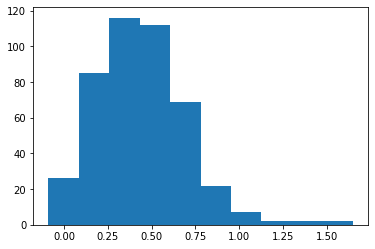

In [36]:
from matplotlib import pyplot as plt
#plt.hist(brns)
plt.hist(contrast)

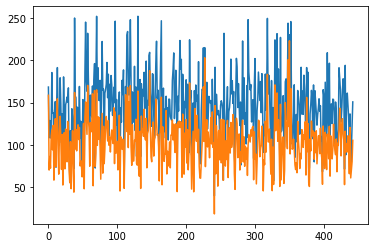

In [132]:
plt.plot(intencity)
plt.plot(intencity_bg)

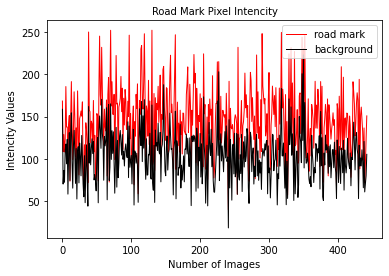

In [180]:
 # brns, contrast, intencity, intencity_bg 
# fig = plt.figure(figsize = (30,15))

# plt.subplot(236), 
# plt.plot(brns, linewidth=2,) # label="brightness", 
# plt.scatter(intencity_bg,  intencity, linewidth=2,) # label="brightness",
w = 50
intv = np.convolve(intencity, np.ones(w), 'valid') / w
intv_bg = np.convolve(intencity_bg, np.ones(w), 'valid') / w

# plt.bar(intencity, intencity_bg)
# intv = np.convolve(brns, np.ones(w), 'valid') / w
# intv_bg = np.convolve(contrast, np.ones(w), 'valid') / w

plt.plot(intencity, label="road mark", linewidth=1, color = 'red')
plt.plot(intencity_bg, label="background", linewidth=1, color = 'black')

# plt.plot(intv, label="road mark", linewidth=3,color = 'red')
# plt.plot(intv_bg, label="background", linewidth=3, color = "black")
# plt.plot(hist_masked, label="Masked Mark", linewidth=2,) # , 
# plt.plot(hist_edges, label="Mark Edges", linewidth=2)
# plt.xlim([0,256])
# plt.xticks([]), plt.yticks([])

# saveimg = f"./output/img{idx}.png"
    # classes = ['org image', 'masked image']
    # plt.legend(loc='upper right', labelspacing=2, handletextpad=2, fontsize = 2)
    # legend = plt.legend(loc='upper right')

plt.title('Road Mark Pixel Intencity', size = 10)     # title 
plt.xlabel('Number of Images')     # x label 
plt.ylabel('Intencity Values')     # y label
plt.legend(loc='upper right')
# plt.xlim([0,256])
plt.savefig('brVScnt1.png')
# plt.legend('',frameon=False)
# legend.remove()
plt.show()

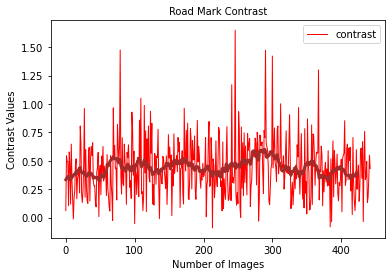

In [191]:
 # brns, contrast, intencity, intencity_bg 
# fig = plt.figure(figsize = (30,15))

# plt.subplot(236), 
# plt.plot(brns, linewidth=2,) # label="brightness", 
# plt.scatter(brns,  intencity, linewidth=2,) # label="brightness",
w = 20
intv = np.convolve(contrast, np.ones(w), 'valid') / w
# intv_bg = np.convolve(intencity_bg, np.ones(w), 'valid') / w

# plt.bar(intencity, intencity_bg)
# intv = np.convolve(brns, np.ones(w), 'valid') / w
# intv_bg = np.convolve(contrast, np.ones(w), 'valid') / w

plt.plot(contrast, label="contrast", linewidth=1, color = 'red')
# plt.plot(intencity_bg, label="background", linewidth=1, color = 'black')

plt.plot(intv, linewidth=3,color = 'brown')
# plt.plot(intv_bg, label="background", linewidth=3, color = "black")
# plt.plot(hist_masked, label="Masked Mark", linewidth=2,) # , 
# plt.plot(hist_edges, label="Mark Edges", linewidth=2)
# plt.xlim([0,256])
# plt.xticks([]), plt.yticks([])

# saveimg = f"./output/img{idx}.png"
    # classes = ['org image', 'masked image']
    # plt.legend(loc='upper right', labelspacing=2, handletextpad=2, fontsize = 2)
    # legend = plt.legend(loc='upper right')

plt.title('Road Mark Contrast', size = 10)     # title 
plt.xlabel('Number of Images')     # x label 
plt.ylabel('Contrast Values')     # y label
plt.legend(loc='upper right')
# plt.xlim([0,256])
plt.savefig('brVScnt1.png')
# plt.legend('',frameon=False)
# legend.remove()
plt.show()

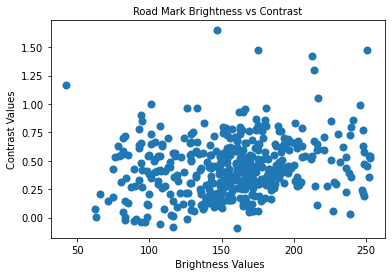

In [72]:
 # brns, contrast, intencity, intencity_bg 
# fig = plt.figure(figsize = (30,15))

# plt.subplot(236), 
# plt.plot(brns, linewidth=2,) # label="brightness", 
plt.scatter(brns,  contrast, linewidth=2,) # label="brightness", 
# plt.plot(hist_masked, label="Masked Mark", linewidth=2,) # , 
# plt.plot(hist_edges, label="Mark Edges", linewidth=2)
# plt.xlim([0,256])
# plt.xticks([]), plt.yticks([])

# saveimg = f"./output/img{idx}.png"
    # classes = ['org image', 'masked imag]
    # plt.legend(loc='upper right', labelspacing=2, handletextpad=2, fontsize = 2)
    # legend = plt.legend(loc='upper right')

plt.title('Road Mark Brightness vs Contrast', size = 10)     # title 
plt.xlabel(' Brightness Values')     # x label 
plt.ylabel('Contrast Values')     # y label
# plt.legend(loc='upper right')
plt.savefig('brVScnt.png')
# plt.legend('',frameon=False)
# legend.remove()
plt.show()

(478, 487)


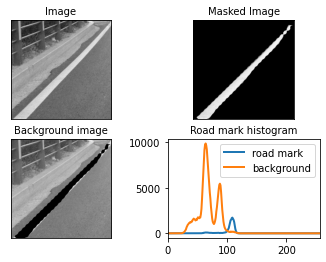

In [127]:
# roadmark and background pixels
img = cv2.imread('rm3.jpg',0)
print(img.shape)
mask = cv2.imread('rm3.png' ,0)
rm_area = np.where(mask==255)
rm_bg = np.where(mask!=255)

# average intensity values for roadmark and background

rm_mask , bg_mask = img[rm_area],img[rm_bg]


masked_img = cv2.bitwise_and(img, img, mask = mask)
r_mask = cv2.bitwise_not(mask)
bg_img = cv2.bitwise_and(img, img, mask = r_mask)

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_rm_mask = cv2.calcHist([img],[0],masked_img,[256],[0,256])
hist_bg_img = cv2.calcHist([img],[0],bg_img,[256],[0,256])
plt.subplot(221), plt.title('Image', size = 10) , plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
# plt.subplot(232), plt.title('Mask', size = 10) , plt.imshow(mask,'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.title('Masked Image', size = 10) , plt.imshow(masked_img, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.title('Background image', size = 10) , plt.imshow(bg_img, 'gray'), plt.xticks([]), plt.yticks([])

# plt.subplot(234), plt.title('Edge Image ', size = 10) ,  plt.imshow(edges, 'gray'), plt.xticks([]), plt.yticks([])
# plt.subplot(235), plt.title('Edge Mask ', size = 10) ,  plt.imshow(masked_edges, 'gray'), plt.xticks([]), plt.yticks([])
# plt.subplot(236), plt.title('Edge Masked Image ', size = 10) ,  plt.imshow(masked_edges, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(224), 
# plt.plot(hist_full, label="Mark Image", linewidth=2,), 
plt.title('Road mark histogram', size = 10)     # title 

plt.plot(hist_rm_mask, label="road mark", linewidth=2,) # , 
plt.plot(hist_bg_img, label="background", linewidth=2)
plt.legend(loc='upper right', labelspacing=2, handletextpad=1, fontsize = 1)
legend = plt.legend(loc='upper right')
plt.xlim([0,256])
# plt.xticks([]), plt.yticks([])
    
plt.savefig("saveimg.png")
# plt.legend('',frameon=False)
# legend.remove()
plt.show()
    

In [85]:
rm_area

(array([  5,   5,   5, ..., 211, 211, 211]),
 array([103, 104, 105, ..., 154, 155, 156]))

In [82]:
mask.shape


(20948,)

In [ ]:
def draw_hist(img, mask, idx): #. get mask and masked image and plot 6 images img, mask, masked image
    img = cv2.imread(img,0)
    mask = cv2.imread(mask,0)
    print('shapeA: ', img.shape)
    print('shapeB: ', mask.shape)
    masked_img = cv2.bitwise_and(img, img, mask = mask)
    masked_img_blur = cv2.GaussianBlur(masked_img, (3,3), 0)
    masked_edges = cv2.Canny(masked_img_blur,100,200) #canney edhe detecton
    edges_blur = cv2.GaussianBlur(img, (3,3), 0)
    edges = cv2.Canny(edges_blur,100,200) #canney edhe detecton
    edges_mask = cv2.Canny(mask,10,20) #canney edhe detecton
    hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_edges = cv2.calcHist([img],[0],masked_edges,[256],[0,256])
    hist_masked = cv2.calcHist([img],[0],masked_img,[256],[0,256])
    plt.subplot(231), plt.title('Image', size = 10) , plt.imshow(img, 'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(232), plt.title('Mask', size = 10) , plt.imshow(mask,'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(233), plt.title('Masked Image', size = 10) , plt.imshow(masked_img, 'gray'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(234), plt.title('Edge Image ', size = 10) ,  plt.imshow(edges, 'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(235), plt.title('Edge Mask ', size = 10) ,  plt.imshow(masked_edges, 'gray'), plt.xticks([]), plt.yticks([])
    plt.subplot(236), plt.title('Edge Masked Image ', size = 10) ,  plt.imshow(masked_edges, 'gray'), plt.xticks([]), plt.yticks([])

    # plt.subplot(236), 
    # plt.plot(hist_full, label="Mark Image", linewidth=2,), 
    # plt.plot(hist_masked, label="Masked Mark", linewidth=2,) # , 
    # plt.plot(hist_edges, label="Mark Edges", linewidth=2)
    # plt.xlim([0,256])
    # plt.xticks([]), plt.yticks([])

    saveimg = f"./output/img{idx}.png"
    # classes = ['org image', 'masked image']
    # plt.legend(loc='upper right', labelspacing=2, handletextpad=2, fontsize = 2)
    # legend = plt.legend(loc='upper right')


    # plt.title('Road Mark Histogram Comparision', size = 10)     # title 
    # plt.xlabel('Pixel Intensity')     # x label 
    # plt.ylabel('Pixel Numbers')     # y label
    # plt.legend(loc='upper right')
    plt.savefig(saveimg)
    # plt.legend('',frameon=False)
    # legend.remove()
    # plt.show()